In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import os

In [13]:
hr = pd.read_csv('G:/My Drive/#myCDACfiles/MachineLearning/Datasets/HR_comma_sep.csv')
X, y = hr.drop('left', axis=1), hr['left']
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
col_trnf = ColumnTransformer([('OHE',ohe, make_column_selector(dtype_include=object))],
                             remainder = 'passthrough',
                             verbose_feature_names_out = False)
col_trnf = col_trnf.set_output(transform='pandas')
X = col_trnf.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


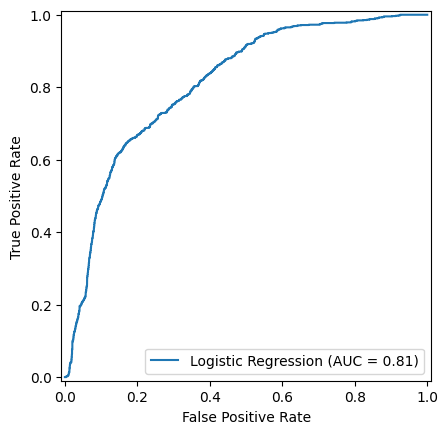

In [18]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,1])
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_pred_prob[:,1]), estimator_name='Logistic Regression')
disp.plot()
plt.show()

In [19]:
solvers = ['lbfgs','newton-cg','newton-cholesky', 'sag','saga']
penalties = ['l2', None]
scores = []
for s in solvers:
    for p in penalties:
        lr = LogisticRegression(penalty=p ,solver=s)
        lr.fit(X_train, y_train)
        y_pred = lr.predict_proba(X_test)
        scores.append([s, p, roc_auc_score(y_test, y_pred_prob[:,1])])
df_scores = pd.DataFrame(scores, columns=['solver','penalty','score'])
df_scores.sort_values('score', ascending=False)

c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown i

,solver,penalty,score
0,lbfgs,l2,0.80927
1,lbfgs,None,0.80927
2,newton-cg,l2,0.80927
3,newton-cg,None,0.80927
4,newton-cholesky,l2,0.80927
5,newton-cholesky,None,0.80927
6,sag,l2,0.80927
7,sag,None,0.80927
8,saga,l2,0.80927
9,saga,None,0.80927


In [20]:
from sklearn.metrics import log_loss

In [21]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)
log_loss(y_test, y_pred_prob)

0.4413917618729973